In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
#load data
loan_data = pd.read_csv("loandata.csv")

In [2]:
loan_data

,Unnamed: 0,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,2,3,35,2.0,VoterID,742936,726092,3,2,0,1
3,3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6995,6995,6996,50,2.0,Aadhar,1030948,1158344,3,2,0,1
6996,6996,6997,46,2.0,Aadhar,781108,691040,7,6,0,1
6997,6997,6998,52,2.0,Aadhar,727636,620336,38,13,0,1
6998,6998,6999,44,1.0,Aadhar,754708,693860,3,2,0,1


In [3]:
#dropping id and proof submitted for loan as they do not have much impact on the loan default parameter
loan_data = loan_data.drop(['Unnamed: 0','loan_id','proof_submitted'],axis=1)

In [4]:
#dropping rows with null values
loan_data.dropna(inplace=True)
loan_data

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,504264,820920,2,2,0,0
1,48,1.0,728556,831444,6,2,0,0
2,35,2.0,742936,726092,3,2,0,1
3,28,1.0,746556,930924,0,0,0,0
4,29,1.0,1139880,1902000,0,0,0,0
...,...,...,...,...,...,...,...,...
6995,50,2.0,1030948,1158344,3,2,0,1
6996,46,2.0,781108,691040,7,6,0,1
6997,52,2.0,727636,620336,38,13,0,1
6998,44,1.0,754708,693860,3,2,0,1


In [5]:
#deleting the rows where total no.of loans are less than current loans
loan_data = loan_data[loan_data['no_of_loans']>=loan_data['no_of_curr_loans']]
loan_data

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,504264,820920,2,2,0,0
1,48,1.0,728556,831444,6,2,0,0
2,35,2.0,742936,726092,3,2,0,1
3,28,1.0,746556,930924,0,0,0,0
4,29,1.0,1139880,1902000,0,0,0,0
...,...,...,...,...,...,...,...,...
6995,50,2.0,1030948,1158344,3,2,0,1
6996,46,2.0,781108,691040,7,6,0,1
6997,52,2.0,727636,620336,38,13,0,1
6998,44,1.0,754708,693860,3,2,0,1


In [6]:
#eliminating if loan amount is zero or in negative values
loan_data = loan_data[loan_data['loan_amount']>0]
loan_data

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,504264,820920,2,2,0,0
1,48,1.0,728556,831444,6,2,0,0
2,35,2.0,742936,726092,3,2,0,1
3,28,1.0,746556,930924,0,0,0,0
4,29,1.0,1139880,1902000,0,0,0,0
...,...,...,...,...,...,...,...,...
6995,50,2.0,1030948,1158344,3,2,0,1
6996,46,2.0,781108,691040,7,6,0,1
6997,52,2.0,727636,620336,38,13,0,1
6998,44,1.0,754708,693860,3,2,0,1


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

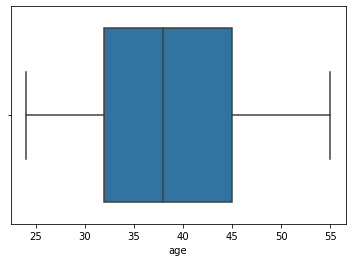

In [7]:
#finding outliers
sns.boxplot(loan_data['age'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amount'>

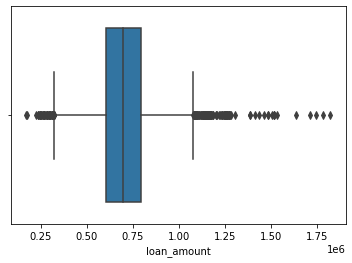

In [8]:
sns.boxplot(loan_data['loan_amount'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_loans'>

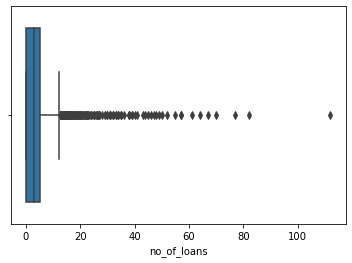

In [9]:
sns.boxplot(loan_data['no_of_loans'])

In [10]:
loan_data = loan_data[loan_data['no_of_loans']<20]
loan_data

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,504264,820920,2,2,0,0
1,48,1.0,728556,831444,6,2,0,0
2,35,2.0,742936,726092,3,2,0,1
3,28,1.0,746556,930924,0,0,0,0
4,29,1.0,1139880,1902000,0,0,0,0
...,...,...,...,...,...,...,...,...
6994,45,2.0,796156,768584,3,2,0,1
6995,50,2.0,1030948,1158344,3,2,0,1
6996,46,2.0,781108,691040,7,6,0,1
6998,44,1.0,754708,693860,3,2,0,1


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_curr_loans'>

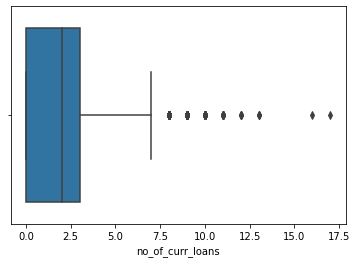

In [11]:
sns.boxplot(loan_data['no_of_curr_loans'])

In [12]:
loan_data = loan_data[loan_data['no_of_curr_loans']<20]
#outliers are not that far from normal values
loan_data

,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,27,1.0,504264,820920,2,2,0,0
1,48,1.0,728556,831444,6,2,0,0
2,35,2.0,742936,726092,3,2,0,1
3,28,1.0,746556,930924,0,0,0,0
4,29,1.0,1139880,1902000,0,0,0,0
...,...,...,...,...,...,...,...,...
6994,45,2.0,796156,768584,3,2,0,1
6995,50,2.0,1030948,1158344,3,2,0,1
6996,46,2.0,781108,691040,7,6,0,1
6998,44,1.0,754708,693860,3,2,0,1


In [13]:
#***********************************************************************************************************
#LINEAR REGRESSION(STATISTICAL ALGORITHM)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#splitting dataset into dependent variables and independent variables
X = loan_data.drop("loan_default", axis=1)
Y = loan_data["loan_default"]

In [14]:
#testing and training datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=42)
#setting linear regression model
linear_reg= LinearRegression()

In [15]:
#model fitting on training data
linear_reg.fit(X_train, Y_train)
y_pred= linear_reg.predict(X_test)

In [16]:
#mean square error
error= mean_squared_error(Y_test, y_pred)
#root mean square error
rms = np.sqrt(error)
#R square
rs = r2_score(Y_test, y_pred)
print("Mean squared error -",error)
print("Root mean squre error- ",rms)
print("R-squared- ", rs)
print("Accuracy- ", rs*100)

Mean squared error - 0.11990785730826654
Root mean squre error-  0.3462771394537424
R-squared-  0.5015005974416202
Accuracy-  50.15005974416202


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


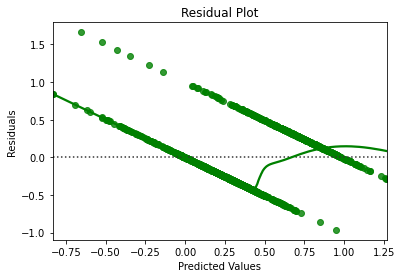

In [17]:
#Residual plotting
import matplotlib.pyplot as plt
sns.residplot(y_pred, Y_test, lowess=True, color="g")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [18]:
#Correlation matrix
corr=X.corr()
print(corr)

                       age  education  loan_amount  asset_cost  no_of_loans  \
age               1.000000   0.109795     0.073023   -0.152598     0.287500   
education         0.109795   1.000000     0.010363    0.076988     0.013920   
loan_amount       0.073023   0.010363     1.000000    0.590470     0.164861   
asset_cost       -0.152598   0.076988     0.590470    1.000000    -0.097053   
no_of_loans       0.287500   0.013920     0.164861   -0.097053     1.000000   
no_of_curr_loans  0.268490   0.005415     0.195767   -0.106072     0.855009   
last_delinq_none  0.029882   0.016735    -0.005504   -0.015382     0.177726   

                  no_of_curr_loans  last_delinq_none  
age                       0.268490          0.029882  
education                 0.005415          0.016735  
loan_amount               0.195767         -0.005504  
asset_cost               -0.106072         -0.015382  
no_of_loans               0.855009          0.177726  
no_of_curr_loans          1.000000   

<AxesSubplot:>

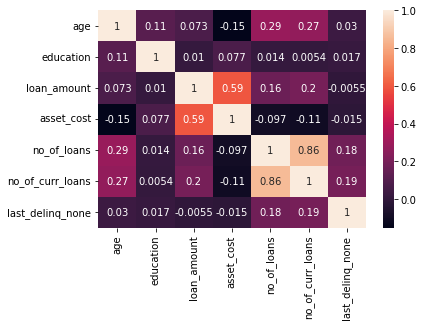

In [19]:
#heatmap for correlation matrix
sns.heatmap(corr, annot=True)

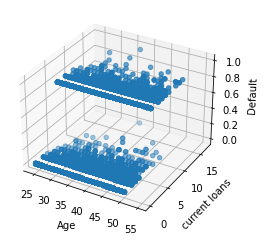

In [20]:
#3D plot between 2 independent and dependent variable
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['age'], X['no_of_curr_loans'], Y)
ax.set_xlabel('Age')
ax.set_ylabel('current loans')
ax.set_zlabel('Default')
plt.show()

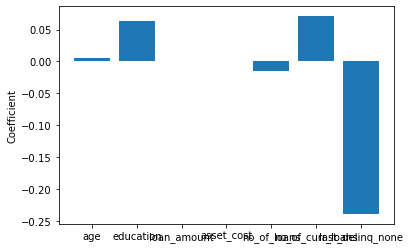

In [21]:
#plotting regression coefficients
plt.bar(range(len(X.columns)), linear_reg.coef_)
plt.xticks(range(len(X.columns)), X.columns)
plt.ylabel('Coefficient')
plt.show()

In [22]:
#**********************************************************************************************
#LOGISTIC REGRESSION(CLASSIFICATION)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#training logistic regression model
log_reg= LogisticRegression()
#model fitting on training data
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [23]:
y_predlog= log_reg.predict(X_test)

In [24]:
#Accuracy of logistic regression on the model
acc= accuracy_score(Y_test, y_predlog)
print("Accuracy- ",(acc*100))

Accuracy-  86.97956093868282


In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm_log= confusion_matrix(Y_test, y_predlog)
cm_log

array([[730,  59],
       [113, 419]], dtype=int64)

<AxesSubplot:>

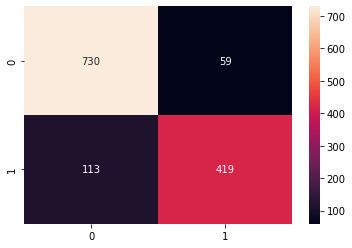

In [26]:
sns.heatmap(cm_log, annot=True, fmt='g')

In [27]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
prob= log_reg.predict_proba(X_test)
fprlog, tprlog, thresholdslog = roc_curve(Y_test, prob[:, 1])
roc_auclog = auc(fprlog, tprlog)

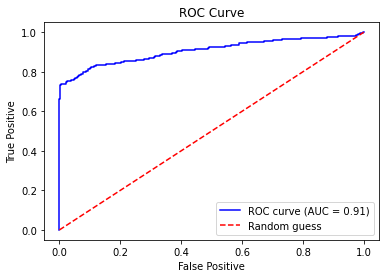

In [28]:
plt.plot(fprlog, tprlog, color='blue', label='ROC curve (AUC = %0.2f)' % roc_auclog)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

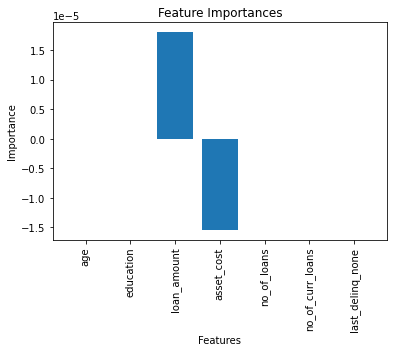

In [29]:
#Feauture importance plot
plt.bar(range(len(log_reg.coef_[0])), log_reg.coef_[0])
plt.xticks(range(len(log_reg.coef_[0])), loan_data.columns[:-1], rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

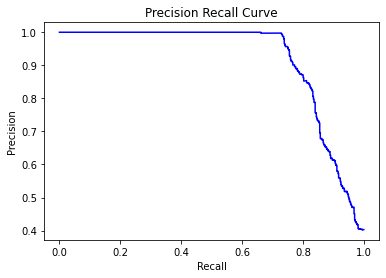

In [30]:
#precision recall
from sklearn.metrics import precision_recall_curve
y_prec= log_reg.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_test, y_prec)
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [31]:
#*************************************************************************************************
#SUPPORT VECTOR MACHINE(CLASSIFICATION)
from sklearn.svm import SVC
#training SVM model
svm1 = SVC(kernel='linear', C=1.0, random_state=42)
svm1.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [32]:
y_predsvm= svm1.predict(X_test)

In [33]:
#Accuracy of support vector machine
acc_svm= accuracy_score(Y_test, y_predsvm)
print("Accuracy- ",(acc_svm*100))

Accuracy-  89.78046934140802


In [34]:
#confusion matrix for svm
cm_svm= confusion_matrix(Y_test, y_predsvm)
cm_svm

array([[758,  31],
       [104, 428]], dtype=int64)

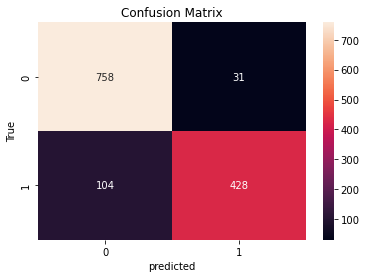

In [35]:
sns.heatmap(cm_svm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('predicted')
plt.ylabel('True')
plt.show()

In [36]:
#support vectors
svm1.support_vectors_

array([[4.20000e+01, 1.00000e+00, 6.89532e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.30000e+01, 1.00000e+00, 7.43364e+05, ..., 4.00000e+00,
        4.00000e+00, 0.00000e+00],
       [4.00000e+01, 2.00000e+00, 5.65740e+05, ..., 6.00000e+00,
        2.00000e+00, 0.00000e+00],
       ...,
       [4.30000e+01, 2.00000e+00, 1.45912e+06, ..., 6.00000e+00,
        4.00000e+00, 0.00000e+00],
       [4.00000e+01, 2.00000e+00, 7.24936e+05, ..., 1.00000e+01,
        6.00000e+00, 0.00000e+00],
       [4.00000e+01, 1.00000e+00, 8.13676e+05, ..., 6.00000e+00,
        5.00000e+00, 0.00000e+00]])

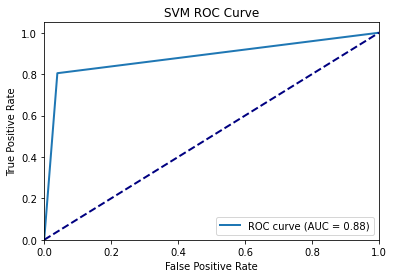

In [37]:
#ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, y_predsvm)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()

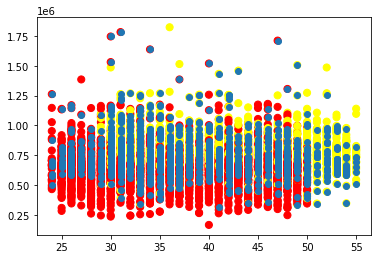

In [38]:
#scatter plot
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 2], c=Y_train, s=50, cmap='autumn')
plt.scatter(svm1.support_vectors_[:,0],svm1.support_vectors_[:,2])

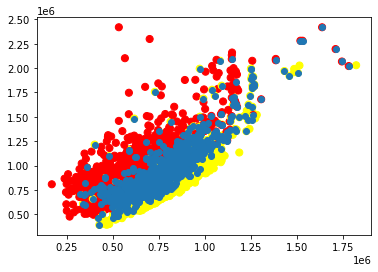

In [39]:
plt.scatter(X_train.iloc[:, 2], X_train.iloc[:, 3], c=Y_train, s=50, cmap='autumn')
plt.scatter(svm1.support_vectors_[:,2],svm1.support_vectors_[:,3])

In [40]:
#**************************************************************************************************
#DECISION TREE(CLASSIFICATION)
from sklearn.tree import DecisionTreeClassifier
#training decision tree model
dec_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [41]:
y_preddec= dec_tree.predict(X_test)

In [42]:
#Accuracy of decision tree
acc_dec= accuracy_score(Y_test, y_preddec)
print("Accuracy- ",(acc_dec*100))

Accuracy-  91.67297501892506


In [43]:
#confusion matrix
cm_dt= confusion_matrix(Y_test, y_preddec)
cm_dt

array([[725,  64],
       [ 46, 486]], dtype=int64)

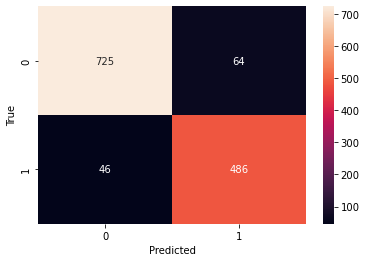

In [44]:
sns.heatmap(cm_dt, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

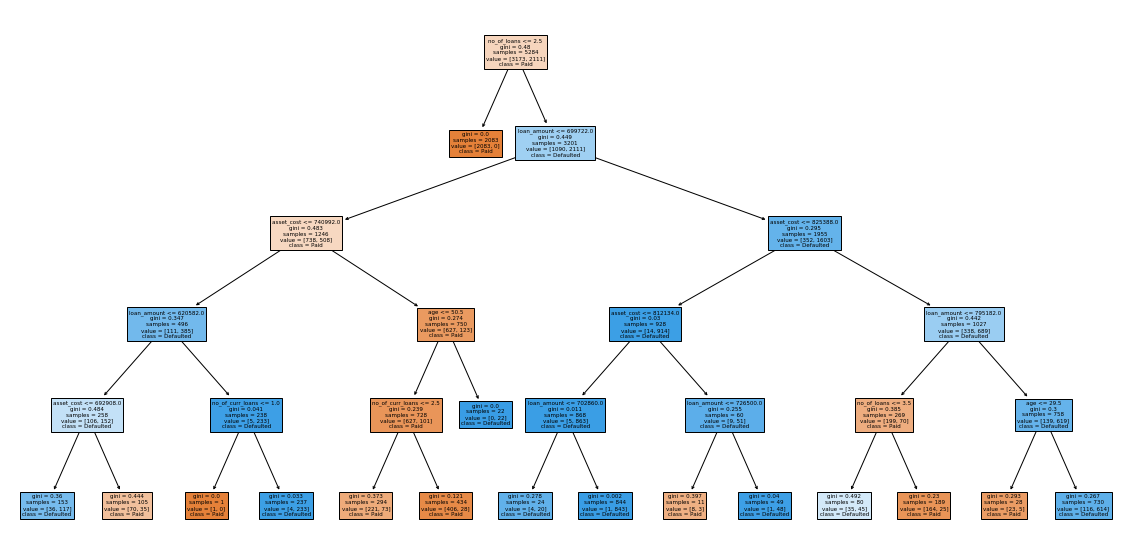

In [45]:
#Tree diagram
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dec_tree, filled=True, feature_names=loan_data.columns[:-1], class_names=['Paid','Defaulted'])
plt.show()

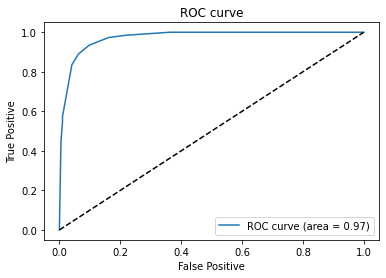

In [46]:
#ROC curve
prob_dt= dec_tree.predict_proba(X_test)
fprdt, tprdt, threshdt = roc_curve(Y_test, prob_dt[:, 1])
roc_aucdt= auc(fprdt, tprdt)
plt.plot(fprdt, tprdt, label='ROC curve (area = %0.2f)' % roc_aucdt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

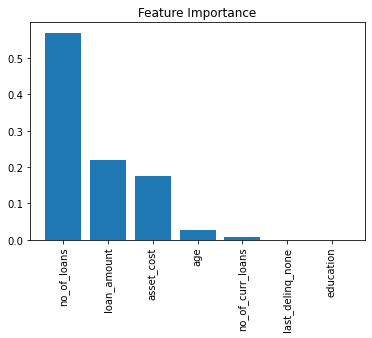

In [47]:
#feature importance plot
impdt= dec_tree.feature_importances_
ind= impdt.argsort()[::-1]
plt.bar(range(X_train.shape[1]), impdt[ind])
plt.xticks(range(X_train.shape[1]), X_train.columns[ind], rotation=90)
plt.title('Feature Importance')
plt.show()

In [49]:
#classification report
from sklearn.metrics import classification_report
cr_dt= classification_report(Y_test, y_preddec)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       789
           1       0.88      0.91      0.90       532

    accuracy                           0.92      1321
   macro avg       0.91      0.92      0.91      1321
weighted avg       0.92      0.92      0.92      1321



In [50]:
#*************************************************************************************************
#NAIVE BAYES CLASSIFIER (STATISTICAL ALGORITHM)
from sklearn.naive_bayes import GaussianNB
#training naive bayes model
naive_b= GaussianNB()
naive_b.fit(X_train, Y_train)

GaussianNB()

In [51]:
y_prednb= naive_b.predict(X_test)

In [52]:
#Accuracy of naive bayes
acc_nb= accuracy_score(Y_test, y_prednb)
print("Accuracy- ",(acc_nb*100))

Accuracy-  82.21044663133989


In [53]:
#confusion matrix
con_mat= confusion_matrix(Y_test, y_prednb)
con_mat

array([[731,  58],
       [177, 355]], dtype=int64)

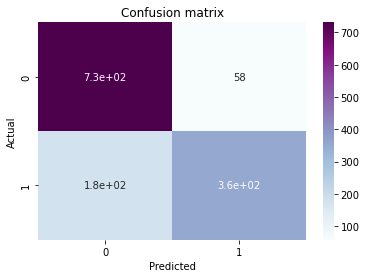

In [54]:
sns.heatmap(con_mat, annot=True, cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

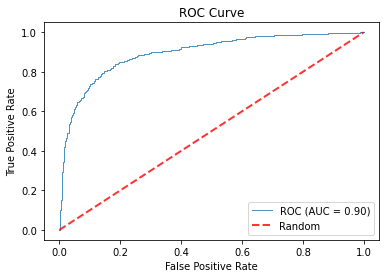

In [55]:
#ROC curve
y_nbp= naive_b.predict_proba(X_test)
fprnb, tprnb, thresholdsnb = roc_curve(Y_test, y_nbp[:,1])
roc_aucnb= auc(fprnb,tprnb)
plt.plot(fprnb, tprnb, lw=1, alpha=0.8, label='ROC (AUC = %0.2f)' % (roc_aucnb))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

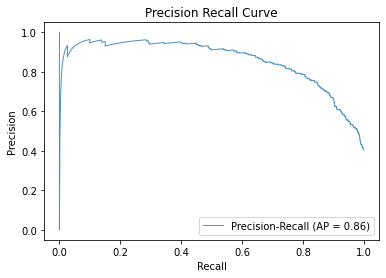

In [56]:
#precision recall curve
from sklearn.metrics import average_precision_score
prec_nb, recall_nb, thresh_nb= precision_recall_curve(Y_test, y_nbp[:,1])
avgprec= average_precision_score(Y_test, y_nbp[:,1])
plt.plot(recall_nb, prec_nb, lw=1, alpha=0.8, label='Precision-Recall (AP = %0.2f)' % (avgprec))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [57]:
#classification report
cr_nb= classification_report(Y_test, y_prednb)
print(cr_nb)

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       789
           1       0.86      0.67      0.75       532

    accuracy                           0.82      1321
   macro avg       0.83      0.80      0.81      1321
weighted avg       0.83      0.82      0.82      1321

